In [33]:
import numpy as np
import mdp1 as mz
import importlib
importlib.reload(mz)
import sys
stdout = sys.stdout
sys.stdout = stdout


In [5]:
# Description of the maze as a numpy array
maze = np.array([
    [0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 1, 1, 1],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 2, 0, 0]
])

In [34]:
# Whether the minotaur is allowed to stay
minotaur_stay=False

# Horizon
T = 30

# Create an environment maze
env = mz.Maze(maze, T,minotaur_stay=minotaur_stay)

# Solves the shortest path problem using dynamic programming
V, policy = mz.dynamic_programming(env, T)

In [37]:
# Method applied
method = 'DynProg'

# Start cell in the maze (player_x, player_y, minotaur_x, minotaur_y)
start = (0, 0, 6, 5)
isWin, isLost, steps, path = env.simulate(start, policy, method)
mz.print_path(path)


Total Steps: 16
Player: (0, 0) -> (0, 1) -> (1, 1) -> (2, 1) -> (3, 1) -> (4, 1) -> (4, 2) -> (4, 3) -> (4, 4) -> (4, 5) -> (4, 6) -> (4, 7) -> (5, 7) -> (6, 7) -> (6, 6) -> (6, 5)
Minota: (6, 5) -> (5, 5) -> (6, 5) -> (6, 4) -> (6, 3) -> (5, 3) -> (4, 3) -> (3, 3) -> (2, 3) -> (2, 4) -> (1, 4) -> (0, 4) -> (0, 5) -> (0, 4) -> (0, 5) -> (0, 6)


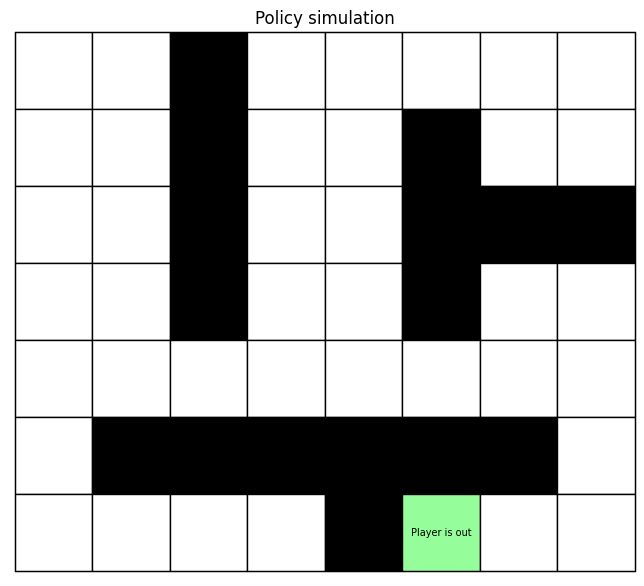

In [12]:
# Animate the shortest path
mz.animate_solution(maze, path)


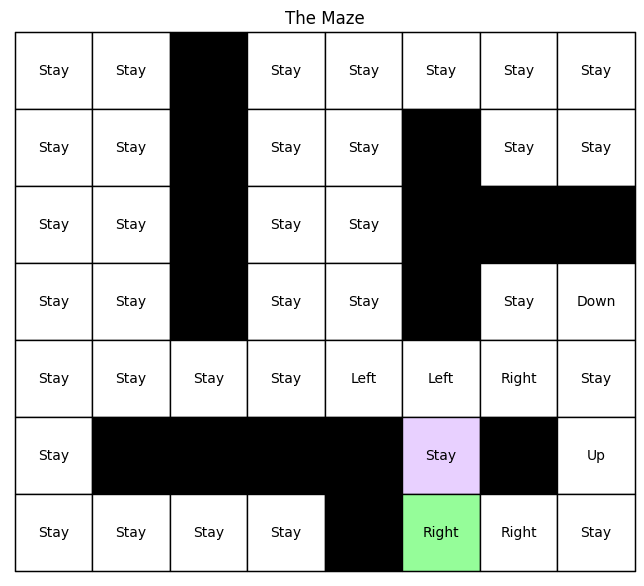

In [5]:
minotaur_pos = (5, 5)
env.draw_path(policy, 28, minotaur_pos)

In [41]:
# Method applied
method = 'DynProg'
# Compute Probability of exiting the maze
start = (0, 0, 6, 5)
trials = 10000

prob_win, avg_steps = env.compute_prob(start, policy, method, trials)
print(prob_win, avg_steps)




1.0 15.0
